### Loan Approval Prediction Model

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Replace 'path/to/your/file.csv' with the actual path to your CSV file
csv_file_path = r'/content/drive/MyDrive/financial_loan Datasets and Description__.csv'
df = pd.read_csv(csv_file_path)

print("CSV file loaded successfully!")
display(df.head())

CSV file loaded successfully!


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,02/11/2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01/01/2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,01/05/2021,12/12/2021,01/09/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12/12/2021,03/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01/01/2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.shape

(38576, 24)

In [5]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [6]:
df.duplicated(subset='id').sum()

np.int64(0)

In [7]:
df.duplicated(subset='member_id').sum()

np.int64(0)

We currently don't have members with more than one loan in the current dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [12]:
df['id'] = df['id'].astype('object')
df['member_id'] = df['member_id'].astype('object')

#### Summary Statistics

In [9]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [13]:
df.describe(include="object")

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status
count,38576,38576,38576,38576,37138,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,38576,50,1,11,28525,7,5,65,107,102,3,102,38576,14,35,2,3
top,767009,CA,INDIVIDUAL,10+ years,US Army,B,RENT,12/11/2021,16-05-2021,16-05-2021,Fully Paid,16-06-2021,968043,Debt consolidation,B3,36 months,Not Verified
freq,1,6894,38576,8870,135,11674,18439,2188,10041,1209,32145,1209,1,18214,2834,28237,16464


### Data Cleaning

clean up datetime columns

In [28]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [15]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='mixed', dayfirst=True)

In [17]:
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], format='mixed', dayfirst=True)

In [18]:
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='mixed', dayfirst=True)

In [19]:
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'], format='mixed', dayfirst=True)

In [20]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-11-02,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-05-01,2021-12-12,2021-09-01,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-12-03,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


check for null values

In [35]:
df.isna().sum().sort_values(ascending=False)

,0
emp_title,1438
id,0
application_type,0
address_state,0
emp_length,0
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [36]:
(df.isna().sum().sort_values(ascending=False)/len(df))/100

,0
emp_title,0.000373
id,0.000000
application_type,0.000000
address_state,0.000000
emp_length,0.000000
grade,0.000000
home_ownership,0.000000
issue_date,0.000000
last_credit_pull_date,0.000000
last_payment_date,0.000000


check categorical columns to see if records are accurate

In [21]:
df['address_state'].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [22]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [23]:
df['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [32]:
df['emp_title'].values

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc',
       'barnes distribution', 'J&J Steel Inc', 'Studio 94 Corp',
       'American Airlines', 'SCI Mahanoy', 'Tech Data Corp',
       'teltow contracting', 'Ericsson', 'myrvpartsplace.com', 'AEG LIVE',
       'henkel corporation', 'AXA Assistance', 'HSA-UWC', "Child's Day",
       'OEC Freight', 'Sandestin Beach Hilton', nan,
       'Norman G. Olson Insurance', nan, 'Infotrieve, Inc.',
       'self employed', 'Clark County School District',
       'The Mount Sinai School of Medicine', 'Blue Ridge Design Group',
       'Abbott Nutrition', 'rice &werthmann',
       'Five County Assoc of Governments', 'north ga dentention center',
       nan, 'sky powersports', 'Synovus Bank',
       'ACUMEN FISCAL AGENT/MS ROBINSON', 'inspired automation inc',
       'self', 'Able Electronics', 'Abraxas I', 'La curacao',
       'Outback Steakhouse', 'URS corp', 'walmart', 'EdgeStream Inc',
       "MAD MATT'S Bar & Grille", 'Dominos Pizza', 'Pesci 

we have very small amount of null values in this column, we can fill it with 'others' for the time being

In [38]:
df['emp_title'] = df['emp_title'].fillna('others')

In [39]:
df['emp_title'].isna().sum()

np.int64(0)

In [40]:
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [41]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [42]:
df['home_ownership'].value_counts()

,count
home_ownership,
RENT,18439
MORTGAGE,17198
OWN,2838
OTHER,98
NONE,3


In [43]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [44]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [45]:
df['purpose'].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [46]:
df['sub_grade'].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [47]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [48]:
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

check numerical columns if there are outliers and clean

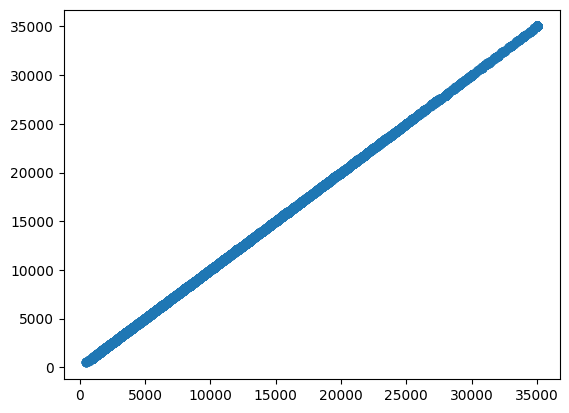

In [54]:
plt.scatter(df['loan_amount'], df['loan_amount'])

no outlier in loan amount

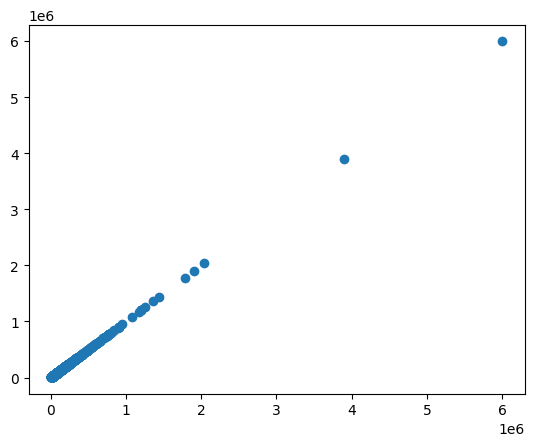

In [55]:
plt.scatter(df['annual_income'], df['annual_income'])

In [56]:
df[df['annual_income'] > 1500000]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
3844,611872,TX,INDIVIDUAL,5 years,Montgomery ISD,A,MORTGAGE,2021-10-11,2021-12-02,2021-11-08,Fully Paid,2021-11-09,784585,credit card,A3,36 months,Source Verified,1900000.0,0.0057,45.75,0.0617,1500,36,1562
7849,269818,FL,INDIVIDUAL,< 1 year,at&t wireless,C,RENT,2021-08-03,2021-01-13,2021-11-03,Fully Paid,2021-11-04,267741,Debt consolidation,C5,36 months,Not Verified,2039784.0,0.0013,281.84,0.1229,8450,11,10146
11725,884755,NY,INDIVIDUAL,10+ years,NYCDOE,C,RENT,2021-11-09,2021-05-16,2021-09-14,Fully Paid,2021-10-14,1100269,Debt consolidation,C2,36 months,Not Verified,1782000.0,0.0131,412.57,0.1427,12025,30,14847
26333,513542,CA,INDIVIDUAL,10+ years,post office,C,MORTGAGE,2021-10-05,2021-11-05,2021-11-04,Fully Paid,2021-11-05,663575,home improvement,C1,36 months,Source Verified,6000000.0,0.0001,167.84,0.1273,5000,10,5514
27136,519954,NM,INDIVIDUAL,3 years,Lea Regional Hospital/Pecos Valley,B,MORTGAGE,2021-10-06,2021-06-15,2021-06-15,Fully Paid,2021-07-15,672152,home improvement,B3,60 months,Not Verified,3900000.0,0.0020,334.08,0.1062,25000,32,20045


In [62]:
t = df[df['annual_income'] < 3000000]

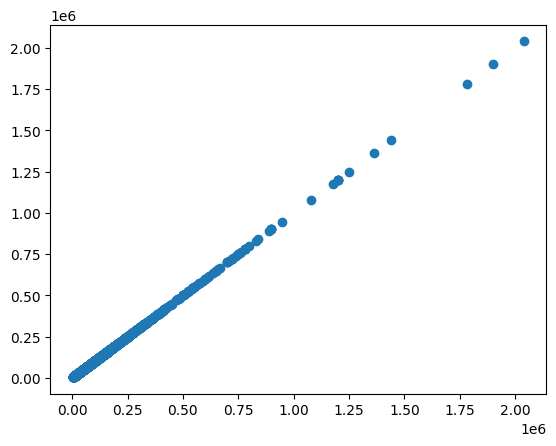

In [63]:
plt.scatter(t['annual_income'], t['annual_income'])

In [59]:
t[t['annual_income'] > 1000000]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
8482,572697,NJ,INDIVIDUAL,1 year,TelSource Corp,A,MORTGAGE,2021-10-09,2021-05-16,2021-10-13,Fully Paid,2021-11-13,736657,Debt consolidation,A4,36 months,Not Verified,1200000.0,0.0917,373.33,0.0751,12000,26,13440
8557,453667,CO,INDIVIDUAL,9 years,Lockheed Martin,A,MORTGAGE,2021-09-11,2021-10-07,2021-10-07,Fully Paid,2021-10-08,561049,Debt consolidation,A3,36 months,Not Verified,1362000.0,0.0062,206.05,0.0774,6600,36,6911
17718,643368,CT,INDIVIDUAL,10+ years,Convent of the Sacred Heart,A,OWN,2021-11-01,2021-03-16,2021-10-13,Fully Paid,2021-11-13,823374,Debt consolidation,A4,36 months,Verified,1200000.0,0.0146,306.68,0.0654,10000,13,11009
21467,603818,LA,INDIVIDUAL,10+ years,Avis Budget Group,D,RENT,2021-10-11,2021-07-13,2021-07-13,Fully Paid,2021-08-13,774761,Debt consolidation,D4,60 months,Source Verified,1200000.0,0.0041,597.38,0.1520,25000,12,33125
21769,830027,MI,INDIVIDUAL,2 years,Stryker Instruments,C,MORTGAGE,2021-11-07,2021-05-16,2021-10-15,Charged Off,2021-11-15,1039166,Debt consolidation,C1,60 months,Verified,1250000.0,0.2181,358.85,0.1299,15775,28,18301
28465,458760,CA,INDIVIDUAL,7 years,Hewlett Packard,A,MORTGAGE,2021-09-11,2021-12-15,2021-11-11,Fully Paid,2021-11-12,571287,major purchase,A2,36 months,Not Verified,1440000.0,0.0000,198.78,0.0740,6400,38,7063
30081,528009,MD,INDIVIDUAL,8 years,St. John Lutheran Church,A,MORTGAGE,2021-10-06,2021-05-13,2021-05-13,Fully Paid,2021-06-13,682915,major purchase,A5,60 months,Source Verified,1080000.0,0.0057,90.99,0.0788,4500,20,5262
31988,468400,NY,INDIVIDUAL,1 year,WCP,A,MORTGAGE,2021-09-12,2021-11-10,2021-11-10,Fully Paid,2021-11-11,589879,other,A3,36 months,Not Verified,1200000.0,0.0080,312.19,0.0774,10000,20,10863
34914,551367,MD,INDIVIDUAL,10+ years,Dept of army,C,MORTGAGE,2021-10-07,2021-08-15,2021-08-15,Fully Paid,2021-09-15,710553,other,C2,60 months,Source Verified,1176000.0,0.0122,129.18,0.1361,5600,25,7750


In [60]:
x = df[df['annual_income'] < 1000000]

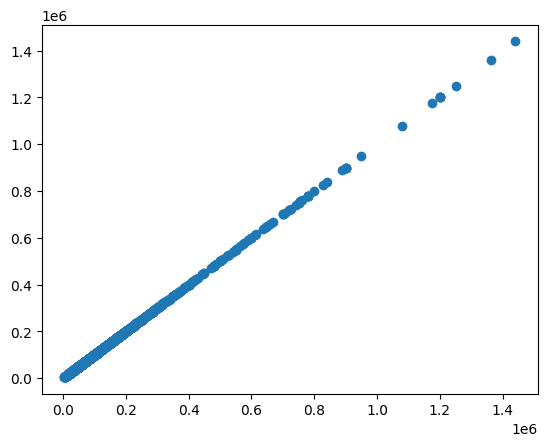

In [61]:
plt.scatter(t['annual_income'], t['annual_income']);